In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load dat data

In [3]:
training = pd.read_csv('training_data.csv',
                       engine='c')
training

,Count,Office 100m,Retail - Shop 100m,Student Accommodation 100m,Residential Apartment 100m,Transport 100m,Office 200m,Retail - Shop 200m,Student Accommodation 200m,Residential Apartment 200m,Transport 200m,Office 300m,Retail - Shop 300m,Student Accommodation 300m,Residential Apartment 300m,Transport 300m
0,3190.333333,44,21,0,27,0,192,75,0,76,0,428,149,14,159,0
1,1586.666667,163,2,0,49,1,275,2,0,121,1,690,13,0,170,1
2,654.000000,68,2,0,77,1,300,8,0,123,1,684,16,0,185,1
3,2233.333333,88,13,0,24,0,239,53,0,112,0,580,145,14,178,0
4,2863.666667,17,54,0,11,0,120,141,0,41,0,336,195,0,146,0
5,3529.000000,21,56,0,2,0,96,131,0,45,0,312,205,0,147,0
6,1278.333333,38,2,0,0,1,212,4,0,162,1,410,8,4,349,1
7,2488.000000,10,4,15,12,0,125,45,15,70,0,187,165,15,241,0
8,1678.666667,10,4,15,12,0,61,23,15,70,0,233,116,15,222,0
9,1068.333333,17,0,0,0,0,105,0,0,22,0,117,0,0,56,2


## Scatter matrix

Throw our data in a frame and plot a scatter matrix to look for correlations. It's all pretty balls. ¯\_(ツ)_/¯

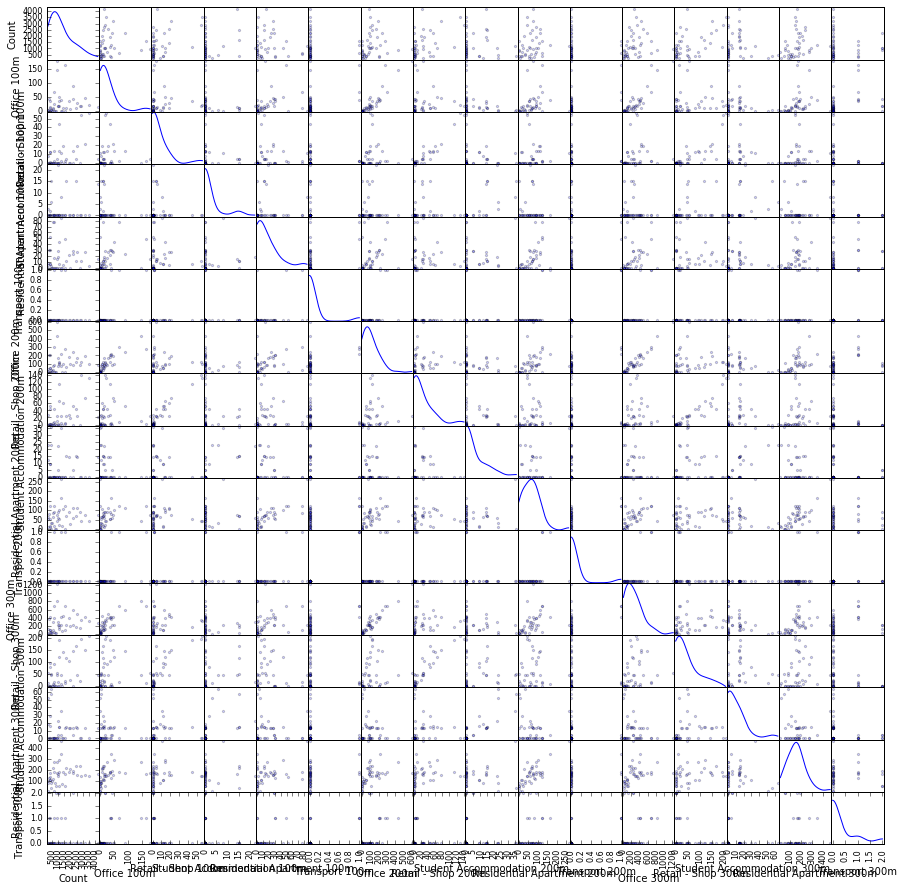

In [4]:
scatter_matrix(training, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

## OLS regression

We need a multiple regression to predict counts based on the surrounding building usages and densities.

In [16]:
'f' + 'oo'

'foo'

In [21]:
import ols

columns_we_care_about = ['Office 300m', 'Retail - Shop 300m', 'Residential Apartment 300m']
for c in columns_we_care_about:
    training[c + '^2'] = training[c] ** 2
    
columns_we_care_about_squared = [c + '^2' for c in columns_we_care_about]
#columns_we_care_about_squared = columns_we_care_about
    
model = ols.ols(training['Count'], training.loc[:,columns_we_care_about_squared], 'Count', columns_we_care_about_squared)
model.summary()


Dependent Variable: Count
Method: Least Squares
Date:  Sun, 31 Jul 2016
Time:  12:25:59
# obs:                  43
# variables:         4
variable     coefficient     std. Error      t-statistic     prob.
const           910.711240      202.483483      4.497706      0.000060
Office 300m^2           0.000097      0.000527      0.184205      0.854807
Retail - Shop 300m^2           0.042949      0.012005      3.577534      0.000946
Residential Apartment 300m^2           0.002643      0.003580      0.738247      0.464784
Models stats                         Residual stats
R-squared             0.259390         Durbin-Watson stat   2.131742
Adjusted R-squared    0.202420         Omnibus stat         19.903894
F-statistic           4.553099         Prob(Omnibus stat)   0.000048
Prob (F-statistic)    0.007894			JB stat              28.680205
Log likelihood       -350.245720			Prob(JB)             0.000001
AIC criterion         16.476545         Skew                 1.419659
BIC criterion    